## Overview

This project analyzes aviation accident data to identify low-risk aircraft for a company entering the aviation industry. By understanding patterns in accidents and incidents, we aim to guide decisions on which types of aircraft the company should acquire, ensuring reduced risk and enhanced safety.


![img](../images.jpeg)

## Business Problem

a company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Understanding
We utilize an extensive dataset from the National Transportation Safety Board covering aviation accidents from 1962 to 2023. This includes detailed information on incident causes, aircraft types, ect.

In [2]:
data = pd.read_csv('./../Data/AviationData.csv', encoding='latin-1', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [4]:
data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## We change column name for more lisibility

In [5]:
rename_dict = {
    'Event.Id': 'EventID',
    'Investigation.Type': 'InvestigationType',
    'Accident.Number': 'AccidentNumber',
    'Event.Date': 'EventDate',
    'Airport.Code': 'AirportCode',
    'Airport.Name': 'AirportName',
    'Injury.Severity': 'InjurySeverity',
    'Aircraft.damage': 'AircraftDamage',
    'Aircraft.Category': 'AircraftCategory',
    'Registration.Number': 'RegistrationNumber',
    'Amateur.Built': 'AmateurBuilt',
    'Number.of.Engines': 'NumberOfEngines',
    'Engine.Type': 'EngineType',
    'Purpose.of.flight': 'PurposeOfFlight',
    'Air.carrier': 'AirCarrier',
    'Total.Fatal.Injuries': 'TotalFatalInjuries',
    'Total.Serious.Injuries': 'TotalSeriousInjuries',
    'Total.Minor.Injuries': 'TotalMinorInjuries',
    'Total.Uninjured': 'TotalUninjured',
    'Weather.Condition': 'WeatherCondition',
    'Broad.phase.of.flight': 'BroadPhaseOfFlight',
    'Report.Status': 'ReportStatus',
    'Publication.Date': 'PublicationDate'
}

data.rename(columns=rename_dict, inplace=True)


## Imputation

Imputation in function of the data types of the project

In [6]:
# Fill numeric columns with 0 
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(0)

# Fill object type columns with Unknown
object_cols = data.select_dtypes(include=['object']).columns
data[object_cols] = data[object_cols].fillna('Unknown')

In [7]:
data['TotalFatalInjuries'] = pd.to_numeric(data['TotalFatalInjuries'], errors='coerce')
data['TotalSeriousInjuries'] = pd.to_numeric(data['TotalSeriousInjuries'], errors='coerce')
data['TotalMinorInjuries'] = pd.to_numeric(data['TotalMinorInjuries'], errors='coerce')
data['WeatherCondition'] = data['WeatherCondition'].replace({'UNK': 'Unknown', 'Unk': 'Unknown'})

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data

,EventID,InvestigationType,AccidentNumber,EventDate,Location,Country,Latitude,Longitude,AirportCode,AirportName,...,PurposeOfFlight,AirCarrier,TotalFatalInjuries,TotalSeriousInjuries,TotalMinorInjuries,TotalUninjured,WeatherCondition,BroadPhaseOfFlight,ReportStatus,PublicationDate
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Unknown,Unknown,...,Personal,Unknown,2.0,0.0,0.0,0.0,Unknown,Cruise,Probable Cause,Unknown
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Unknown,Unknown,...,Personal,Unknown,4.0,0.0,0.0,0.0,Unknown,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Unknown,Unknown,...,Personal,Unknown,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Unknown,Unknown,...,Personal,Unknown,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Unknown,Unknown,...,Personal,Unknown,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Unknown,Unknown,Unknown,Unknown,...,Personal,Unknown,0.0,1.0,0.0,0.0,Unknown,Unknown,Unknown,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,Unknown
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,Unknown,0.0,0.0,0.0,1.0,VMC,Unknown,Unknown,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Unknown,Unknown,Unknown,Unknown,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,Unknown,Unknown,Unknown,Unknown


In [10]:
accidents_by_make = data['Make'].value_counts()
print(accidents_by_make.head())

Make
Cessna    22227
Piper     12029
CESSNA     4922
Beech      4330
PIPER      2841
Name: count, dtype: int64


In [11]:
weather_analysis = data['WeatherCondition'].value_counts()
print(weather_analysis.head())

WeatherCondition
VMC        77303
IMC         5976
Unknown     5610
Name: count, dtype: int64


In [12]:
phase_analysis = data['BroadPhaseOfFlight'].value_counts()
print("Accidents by Phase of Flight:")
print(phase_analysis.head())


Accidents by Phase of Flight:
BroadPhaseOfFlight
Unknown        27713
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Name: count, dtype: int64


In [13]:
engine_analysis = data['EngineType'].value_counts()
print("Accidents by Phase of Flight:")
print(engine_analysis.head())

Accidents by Phase of Flight:
EngineType
Reciprocating    69530
Unknown           9147
Turbo Shaft       3609
Turbo Prop        3391
Turbo Fan         2481
Name: count, dtype: int64


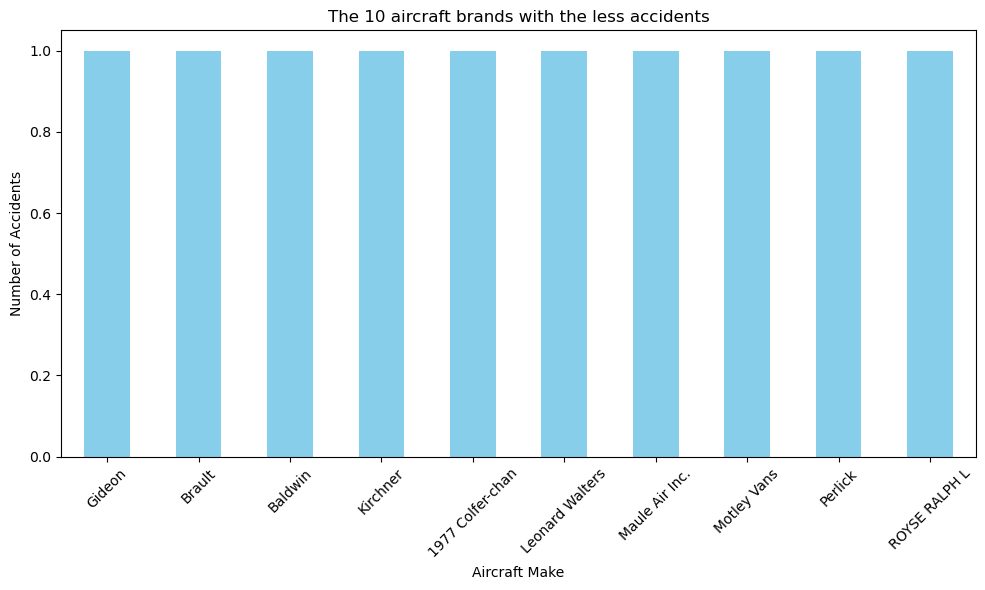

In [20]:
# Accidents par make
accidents_by_make = data['Make'].value_counts()

# Visualisation
plt.figure(figsize=(10, 6))
accidents_by_make.tail(10).plot(kind='bar', color='skyblue')
plt.title('The 10 aircraft brands with the less accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

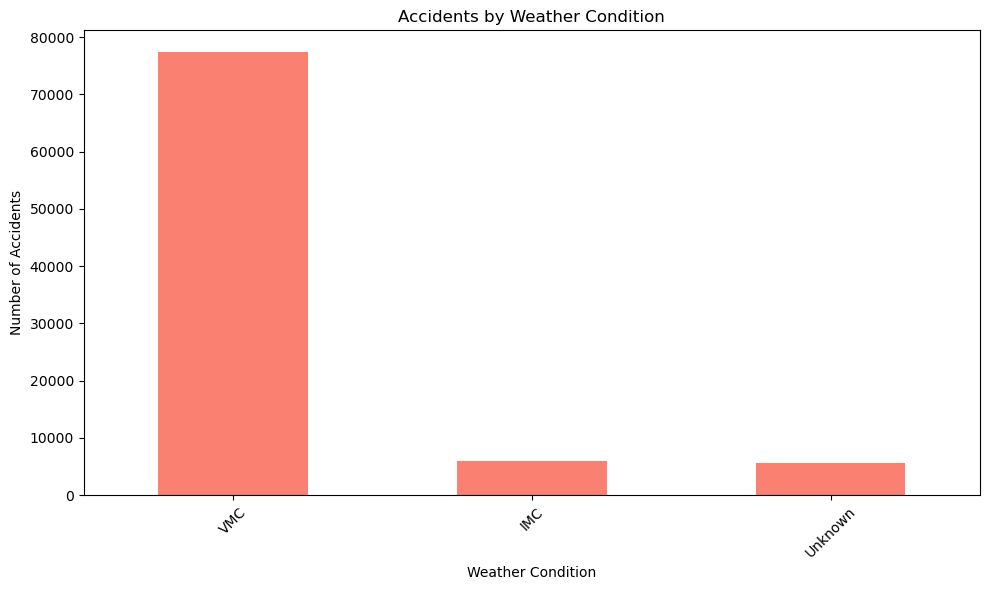

In [15]:
weather_analysis = data['WeatherCondition'].value_counts()

# Visualisation
plt.figure(figsize=(10, 6))
weather_analysis.plot(kind='bar', color='salmon')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

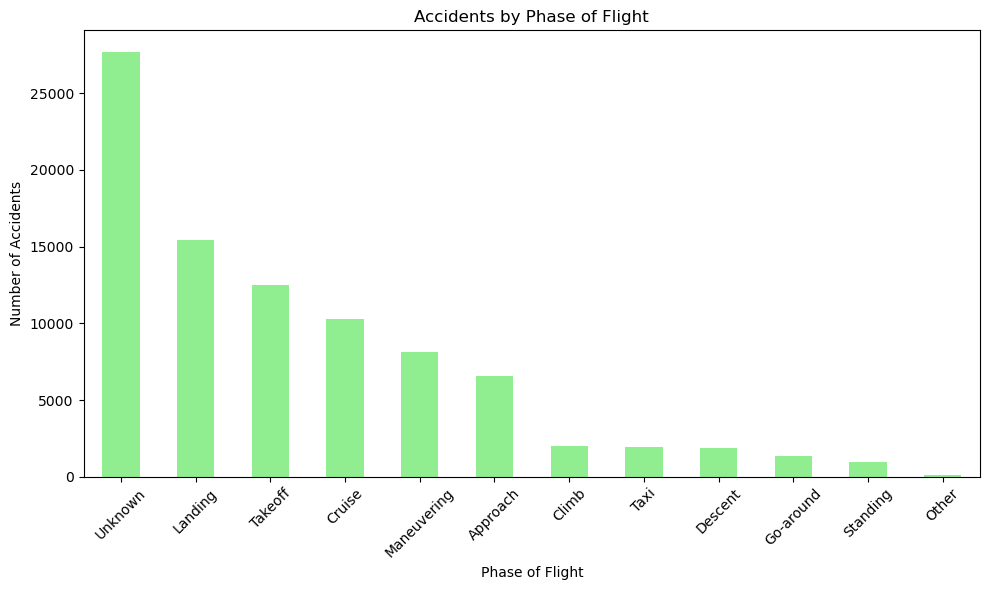

In [16]:
phase_analysis = data['BroadPhaseOfFlight'].value_counts()

# Visualisation
plt.figure(figsize=(10, 6))
phase_analysis.plot(kind='bar', color='lightgreen')
plt.title('Accidents by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

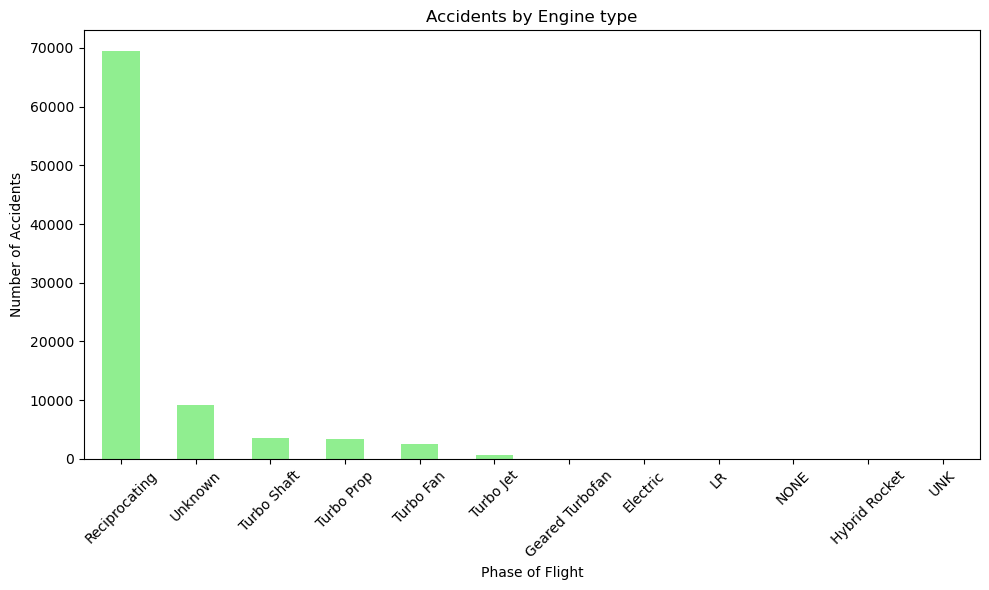

In [17]:
phase_analysis = data['EngineType'].value_counts()

# Visualisation
plt.figure(figsize=(10, 6))
phase_analysis.plot(kind='bar', color='lightgreen')
plt.title('Accidents by Engine type')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

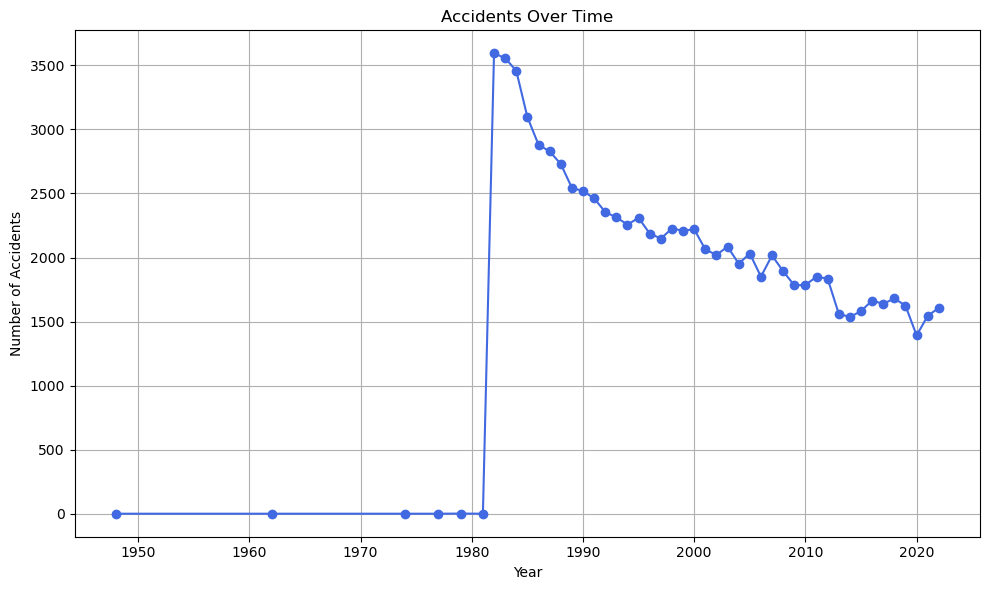

In [18]:
data['EventDate'] = pd.to_datetime(data['EventDate'], errors='coerce')
accidents_per_year = data['EventDate'].dt.year.value_counts().sort_index()

# Visualisation
plt.figure(figsize=(10, 6))
accidents_per_year.plot(kind='line', marker='o', color='royalblue')
plt.title('Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
data.to_csv('cleaned_aviation_data.csv', index=False)